In [12]:
from langgraph.graph import StateGraph, START , END
from typing import TypedDict

In [13]:
## define state
class BMIState(TypedDict):
    weight_kg : float
    height_m : float
    bmi : float
    verdict : str

In [14]:
def calculate_bmi(state : BMIState) -> BMIState:

    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight/(height**2)

    state['bmi'] = round(bmi , 2)
    
    return state


In [18]:
def decision(state : BMIState)-> BMIState:
    bmi = state['bmi']

    if(bmi < 18.5):
        state['verdict'] = 'underweight'
    elif (bmi >= 18.5 ):
        state['verdict'] = 'normal'
    else:
        state['verdict'] = 'overweight'
    
    return state

In [19]:
## define the graph
graph = StateGraph(BMIState)

## add nodes to the graph
graph.add_node('calculator' , calculate_bmi)

graph.add_node('verdict' , decision)
## add edge
graph.add_edge(START , 'calculator')
graph.add_edge('calculator' , 'verdict')
graph.add_edge('verdict' , END)

## compile
workflow = graph.compile()




In [20]:
## execute
input_state = {'weight_kg':80 , 'height_m':1.73}
output_state = workflow.invoke(input_state)
output_state

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'verdict': 'normal'}

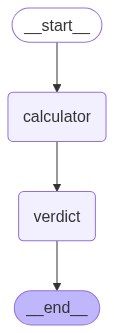

In [22]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())